In [14]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Cargar el archivo csv en un DataFrame
df = pd.read_csv('covid.csv')

# Cargar el archivo csv en un DataFrame
pd.read_csv('covid.csv')
df = pd.read_csv('covid.csv')

# Eliminar las columnas que no necesitas
columnas_a_eliminar = ['id','patient_type','entry_date','date_symptoms','date_died','other_disease','icu']
df.drop(columnas_a_eliminar, axis=1, inplace=True)

#Filtrar las filas y eliminar aquellas que tengan el valor 3 en la columna covid_res
df=df[df['covid_res'] !=3]

#Filtrar las filas y eliminar aquellas que tengan el valor 3 en la columna covid_res
df=df[df['contact_other_covid'] !=99]

#Filtrar las filas y eliminar aquellas que tengan el valor 3 en la columna covid_res
df=df[df['tobacco'] !=98]

#Filtrar las filas y eliminar aquellas que tengan el valor 3 en la columna covid_res
df=df[df['renal_chronic'] !=98]

#Filtrar las filas y eliminar aquellas que tengan el valor 3 en la columna covid_res
df=df[df['obesity'] !=98]

#Filtrar las filas y eliminar aquellas que tengan el valor 3 en la columna covid_res
df=df[df['cardiovascular'] !=98]

#Filtrar las filas y eliminar aquellas que tengan el valor 3 en la columna covid_res
df=df[df['hypertension'] !=98]

#Filtrar las filas y eliminar aquellas que tengan el valor 3 en la columna covid_res
df=df[df['inmsupr'] !=98]

#Filtrar las filas y eliminar aquellas que tengan el valor 3 en la columna covid_res
df=df[df['asthma'] !=98]

#Filtrar las filas y eliminar aquellas que tengan el valor 3 en la columna covid_res
df=df[df['copd'] !=98]

#Filtrar las filas y eliminar aquellas que tengan el valor 3 en la columna covid_res
df=df[df['diabetes'] !=98]

#Filtrar las filas y eliminar aquellas que tengan el valor 3 en la columna covid_res
df=df[df['pregnancy'] !=97]

#Filtrar las filas y eliminar aquellas que tengan el valor 3 en la columna covid_res
df=df[df['pneumonia'] !=99]

#Filtrar las filas y eliminar aquellas que tengan el valor 3 en la columna covid_res
df=df[df['intubed'] !=97]


In [15]:
#Definir las caracteristicas y la variable objetivo
x =  df.drop(['covid_res'], axis=1)
y = df['covid_res']

In [16]:
# Dividir los datos en un conjunto de entrenamiento y un conjunto de prueba
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [18]:
# Crear el modelo de k vecinos más cercano
model = KNeighborsClassifier(n_neighbors=5)

In [19]:
# Entrenar el modelo con los datos entrenamiento
model.fit(x_train, y_train)

KNeighborsClassifier()

In [20]:
#Realizar predicciones con los datos de prueba
y_pred = model.predict(x_test)

C:\Users\FRANK\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [21]:
# Calcular la precisión del modelo
accuracy = accuracy_score(y_test, y_pred)
print('Precisión del modelo: ', accuracy)

Precisión del modelo:  0.6242100145843461


In [25]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix

#Definir las columnas que se utilizarón como caracteristicas
features = ['sex','intubed','pneumonia','age','pregnancy','diabetes','copd','asthma','inmsupr','hypertension','cardiovascular','obesity','renal_chronic','tobacco','contact_other_covid']

# Definir la columna que se utilizara como objetivo
target = 'covid_res'

# Dividir el conjunto de datos en caracteristicas (x) y objetos (y)
x = df[features]
y = df[target]

# Dividir el conjunto de datos en conjuntos de entrenamiento y prueba
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

# Crear el modelo de KNN con un valor de k de 5
knn = KNeighborsClassifier(n_neighbors=5)

# Entrenar el modelo con el conjunto de entrenamiento
knn.fit(x_train, y_train)

# Realizar las predicciones con el conjunto de prueba 
y_pred = knn.predict(x_test)

# Crear la matriz de confusión
conf_mat = confusion_matrix(y_test, y_pred)

# Imprimir la matriz de confusión
print(conf_mat)

C:\Users\FRANK\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


[[2747  846]
 [1473 1105]]


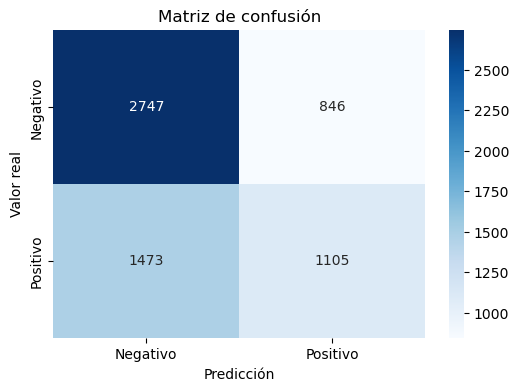

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

# Crear una figura para la matriz de confusión
fig, ax = plt.subplots(figsize=(6, 4))

# Crear la matriz de confusión utilizando la función heatmap de seaborn
sns.heatmap(conf_mat, annot=True, cmap="Blues", fmt="d", xticklabels=["Negativo","Positivo"], yticklabels=["Negativo","Positivo"])

# Configurar las etiquetas de los ejes
ax.set_xlabel('Predicción')
ax.set_ylabel('Valor real')
ax.set_title('Matriz de confusión')

# Mostrar la figura
plt.show()
